### 당뇨병 데이터로 다중 회귀
- linearRegression
- SVR
- RandomForestRegressor
- MSE 비교 (크게 나옴.)

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
db = load_diabetes()

In [27]:
df = pd.DataFrame(db.data, columns=db.feature_names)
df['target']= db.target
df.head(4)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0


- 각 피쳐별 산점도와 선형회귀선

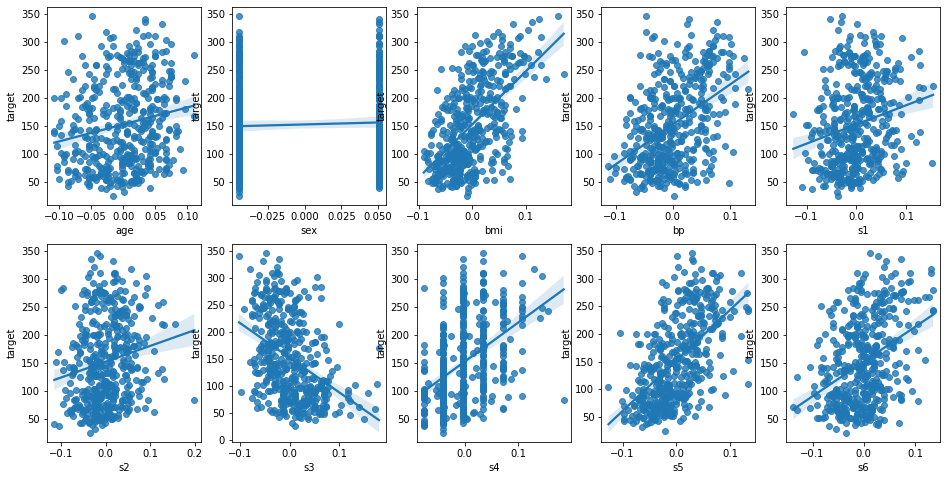

In [28]:
_, axs = plt.subplots(nrows=2, ncols=5, figsize=(16,8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i//5, i%5
    sns.regplot(x=feature, y='target', data=df, ax=axs[row][col])


- 각 피쳐별 R Squared value

In [29]:
from sklearn.linear_model import LinearRegression
y= db.target
for feature in df.columns[:-1]:
    X =df[feature].values.reshape(-1,1)
    lr = LinearRegression()
    lr.fit(X,y)
    r2= lr.score(X,y)
    print(f'{feature}:{r2:4f}')

age:0.035302
sex:0.001854
bmi:0.343924
bp:0.194908
s1:0.044954
s2:0.030295
s3:0.155859
s4:0.185290
s5:0.320224
s6:0.146294


- train/ test 데이터셋 분리

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    db.data, db.target, test_size=0.1, random_state=1800
)

- linearRegression

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train) # 훈련
pred_lr = lr.predict(X_test)

In [32]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, pred_lr) # 실제랑 예측값이랑 비교
mse_lr

2373.0212165923435

- SVR

In [33]:
from sklearn.svm import SVR
svr =SVR()
svr.fit(X_train, y_train)
pred_svr = svr.predict(X_test)
mse_svr = mean_squared_error(y_test, pred_svr)
mse_svr

4655.537497266588

- RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=2022)
rfr.fit(X_train, y_train)
pred_rfr = rfr.predict(X_test)
mse_rfr = mean_squared_error(y_test, pred_rfr)
mse_rfr

3449.5489000000007

- MSE 비교

In [35]:
# MSE
print(f'LR:{mse_lr:.4f}, SVR:{mse_svr:.4f}, RF:{mse_rfr:.4f}')

LR:2373.0212, SVR:4655.5375, RF:3449.5489


In [36]:
df2 = pd.DataFrame(
    {'y_test':y_test, 'LR': pred_lr, 'SVR':pred_svr, 'RF':pred_rfr}
)
df2.head(4)

,y_test,LR,SVR,RF
0,83.0,146.101560,142.735143,136.75
1,79.0,120.847155,127.670845,103.51
2,63.0,61.021173,117.263200,80.56
3,139.0,128.908348,147.483143,137.48
